In [1]:
import pandas as pd  # Data processing, Input & Output load

import seaborn as sns  #Data visualisation

import nltk # Natural Language Toolkit (statistical natural language processing (NLP) libraries )
from nltk.stem.porter import *   # Stemming porterstemmer (not using lemmatizer)

from sklearn.feature_extraction.text import TfidfVectorizer

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train_MR = pd.read_csv("train.tsv", sep="\t") # Train Moview Reviews 
test_MR = pd.read_csv("test.tsv", sep="\t")

FileNotFoundError: [Errno 2] No such file or directory: 'train.tsv'

In [3]:
print('Train Data - ', train_MR.shape)
train_MR.head(25)

NameError: name 'train_MR' is not defined

In [ ]:
print('Test Data - ', test_MR.shape)

In [ ]:
train_MR.describe()

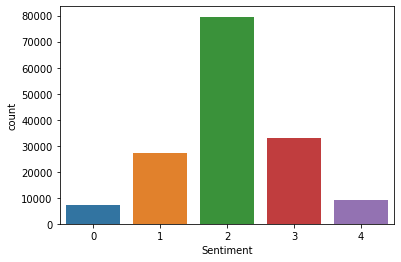

In [ ]:
sns.countplot(data=train_MR, x='Sentiment') # bar chart

In [ ]:
dist = train_MR.groupby(["Sentiment"]).size() # groupby helps in getting the counts of unique items
print(dist)

dist_Percentage = round((dist / dist.sum())*100, 2)
print(dist_Percentage)

Sentiment
0     7072
1    27273
2    79582
3    32927
4     9206
dtype: int64
Sentiment
0     4.53
1    17.48
2    50.99
3    21.10
4     5.90
dtype: float64


In [ ]:
# Python community that try not to use for loops with pd df
# intead of using for i in train_MR['Phrase']
# use .apply(pass a function) --> much more efficient way than for loop to deal with pd df

In [ ]:
train_MR['Length'] = train_MR['Phrase'].apply(lambda x: len(str(x).split(' ')))   ## Will get the length of each phrase 
test_MR['Length'] = test_MR['Phrase'].apply(lambda x: len(str(x).split(' '))) 
# .apply pd df --> .apply(has to be a function), python def sum():, this function gets applied to every item in pd df
# this is like a for loop on every item on the pd df to the functions task

# Just as you have single line loop in python, similarly you have single line functions in python known as lambda functions.
train_MR.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length
0,1,1,A series of escapades demonstrating the adage ...,1,37
1,2,1,A series of escapades demonstrating the adage ...,2,14
2,3,1,A series,2,2
3,4,1,A,2,1
4,5,1,series,2,1


In [ ]:
train_MR['Length'] = 0
train_MR.head()

In [ ]:
s = 'A good bat'
s.split(' ')

In [ ]:
# lambda x: len(str(x).split(' ')) so this single line lambda function does the exact same work as the below 2 lines.
# single line lambda function is a python functionality just like single line for loop
# lambda has a specific meaning in python just like print has a specific meaning in python
def return_length(x):
    return len(str(x).split(' '))

return_length('this series') # sending data to the function

train_MR['Length'] = train_MR['Phrase'].apply(return_length)
# sending the function to the data, but still data has to pass through function to get processed like before
# opeartion-wise there is nothing new or different only the coding method has changed
# this way of coding method where we send the function to the data is called functional programming
# big-data, pySpark, Hive, Hadoop, scala, haskell  --> functional programming coding method
train_MR.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length
0,1,1,A series of escapades demonstrating the adage ...,1,37
1,2,1,A series of escapades demonstrating the adage ...,2,14
2,3,1,A series,2,2
3,4,1,A,2,1
4,5,1,series,2,1


In [ ]:
for i in range(train_MR.shape[0]):
    train_MR.iloc[i, 4] = 0
train_MR.head()

In [ ]:
train_MR['Length'] = 0 # entire column operations are encouraged in pd df
train_MR.head() # loop in pd df becomes very slow

In [ ]:
for i in range(train_MR.shape[0]):
    train_MR.iloc[i, 4] = len(str(train_MR.iloc[i, 2]).split(' '))
train_MR.head()

In [ ]:
train_MR.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
Length        0
dtype: int64

In [ ]:
test_MR.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Length        0
dtype: int64

In [ ]:
train_MR['cat'] = 'TRAIN'
test_MR['cat'] = 'TEST'

In [ ]:
train_MR.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length,cat
0,1,1,A series of escapades demonstrating the adage ...,1,37,TRAIN
1,2,1,A series of escapades demonstrating the adage ...,2,14,TRAIN
2,3,1,A series,2,2,TRAIN
3,4,1,A,2,1,TRAIN
4,5,1,series,2,1,TRAIN


In [ ]:
test_MR.head()

,PhraseId,SentenceId,Phrase,Length,cat
0,156061,8545,An intermittently pleasing but mostly routine ...,8,TEST
1,156062,8545,An intermittently pleasing but mostly routine ...,7,TEST
2,156063,8545,An,1,TEST
3,156064,8545,intermittently pleasing but mostly routine effort,6,TEST
4,156065,8545,intermittently pleasing but mostly routine,5,TEST


In [ ]:
train_test = train_MR.append(test_MR, ignore_index=True) # Theoretically this is not encouraged,for example and learning purposes, but in reality we are not supposed to that
#combining both the train and test to process their columns together
train_test.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length,cat
0,1,1,A series of escapades demonstrating the adage ...,1.0,37,TRAIN
1,2,1,A series of escapades demonstrating the adage ...,2.0,14,TRAIN
2,3,1,A series,2.0,2,TRAIN
3,4,1,A,2.0,1,TRAIN
4,5,1,series,2.0,1,TRAIN


In [ ]:
train_test.tail()

,PhraseId,SentenceId,Phrase,Sentiment,Length,cat
222347,222348,11855,"A long-winded , predictable scenario .",NaN,6,TEST
222348,222349,11855,"A long-winded , predictable scenario",NaN,5,TEST
222349,222350,11855,"A long-winded ,",NaN,3,TEST
222350,222351,11855,A long-winded,NaN,2,TEST
222351,222352,11855,predictable scenario,NaN,2,TEST


In [ ]:
train_MR.tail()

,PhraseId,SentenceId,Phrase,Sentiment,Length,cat
156055,156056,8544,Hearst 's,2,2,TRAIN
156056,156057,8544,forced avuncular chortles,1,3,TRAIN
156057,156058,8544,avuncular chortles,3,2,TRAIN
156058,156059,8544,avuncular,2,1,TRAIN
156059,156060,8544,chortles,2,1,TRAIN


In [ ]:
test_MR.tail()

,PhraseId,SentenceId,Phrase,Length,cat
66287,222348,11855,"A long-winded , predictable scenario .",6,TEST
66288,222349,11855,"A long-winded , predictable scenario",5,TEST
66289,222350,11855,"A long-winded ,",3,TEST
66290,222351,11855,A long-winded,2,TEST
66291,222352,11855,predictable scenario,2,TEST


In [ ]:
156059+66292

222351

In [ ]:
train_test['PreProcess_Sentence'] = train_test['Phrase'].str.replace("[^a-zA-Z#]", " ") #RegEx to remove punctuation
train_test.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length,cat,PreProcess_Sentence
0,1,1,A series of escapades demonstrating the adage ...,1.0,37,TRAIN,A series of escapades demonstrating the adage ...
1,2,1,A series of escapades demonstrating the adage ...,2.0,14,TRAIN,A series of escapades demonstrating the adage ...
2,3,1,A series,2.0,2,TRAIN,A series
3,4,1,A,2.0,1,TRAIN,A
4,5,1,series,2.0,1,TRAIN,series


In [ ]:
train_test['PreProcess_Sentence'] = train_test['PreProcess_Sentence'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# fancy python -- function, for, if, list --> all in 1 line
train_test.head()

In [ ]:
train_test['PreProcess_Sentence'] = train_test['Phrase'].str.replace("[^a-zA-Z#]", " ")
train_test.head()

In [ ]:
temp = 'abra ca dabra'
temp.split()

['abra', 'ca', 'dabra']

In [ ]:
' '.join(['abra', 'ca', 'dabra'])

In [ ]:
' '.join(['abra', '', 'dabra'])

In [ ]:
' '.join([''])

In [ ]:
' '.join([])

In [ ]:
temp = [] # empty list
for w in 'abra ca dabra'.split(): # for w in list ['abra', 'ca', 'dabra'], 'cat, 'hen', 'the', 'how'
    if len(w)>3:
        temp.append(w)
print(temp)
' '.join(temp) # complete opposite .split()
# .split() takes a string and returns a list of space-separated word
# .join() takes alist of words and returns a space-separated string of those words

['abra', 'dabra']


'abra dabra'

In [ ]:
def preprocess_sentence(x):
    temp = []
    for w in x.split():
        if len(w)>3:
            temp.append(w)
    return ' '.join(temp)

train_test['PreProcess_Sentence'] = train_test['PreProcess_Sentence'].apply(preprocess_sentence)
train_test.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length,cat,PreProcess_Sentence
0,1,1,A series of escapades demonstrating the adage ...,1.0,37,TRAIN,series escapades demonstrating adage that what...
1,2,1,A series of escapades demonstrating the adage ...,2.0,14,TRAIN,series escapades demonstrating adage that what...
2,3,1,A series,2.0,2,TRAIN,series
3,4,1,A,2.0,1,TRAIN,
4,5,1,series,2.0,1,TRAIN,series


In [ ]:
train_test['PreProcess_Sentence'] = train_test['PreProcess_Sentence'].str.lower()
train_test['PreProcess_Sentence'].head()

0    series escapades demonstrating adage that what...
1    series escapades demonstrating adage that what...
2                                               series
3                                                     
4                                               series
Name: PreProcess_Sentence, dtype: object

In [ ]:
train_test['tokenized_words'] = train_test['PreProcess_Sentence'].apply(lambda x: x.split())
train_test.tokenized_words.head()

0    [series, escapades, demonstrating, adage, that...
1    [series, escapades, demonstrating, adage, that...
2                                             [series]
3                                                   []
4                                             [series]
Name: tokenized_words, dtype: object

In [ ]:
train_test.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length,cat,PreProcess_Sentence,tokenized_words
0,1,1,A series of escapades demonstrating the adage ...,1.0,37,TRAIN,series escapades demonstrating adage that what...,"[series, escapades, demonstrating, adage, that..."
1,2,1,A series of escapades demonstrating the adage ...,2.0,14,TRAIN,series escapades demonstrating adage that what...,"[series, escapades, demonstrating, adage, that..."
2,3,1,A series,2.0,2,TRAIN,series,[series]
3,4,1,A,2.0,1,TRAIN,,[]
4,5,1,series,2.0,1,TRAIN,series,[series]


In [ ]:
train_test['tokenized_words'].head()
# train_test.tokenized_words.head(). # Both these code lines are doing the exact same thing, just different ways of writing

0    [series, escapades, demonstrating, adage, that...
1    [series, escapades, demonstrating, adage, that...
2                                             [series]
3                                                   []
4                                             [series]
Name: tokenized_words, dtype: object

In [ ]:
stemming = PorterStemmer() # stemming
# nltk 2 types of stemmers - porter stemmer, snowball stemmer 
train_test['tokenized_words'] = train_test.tokenized_words.apply(lambda x: [stemming.stem(i) for i in x]) # stemming
#stemming.stem(word)
print(train_test.tokenized_words.head())

0    [seri, escapad, demonstr, adag, that, what, go...
1    [seri, escapad, demonstr, adag, that, what, go...
2                                               [seri]
3                                                   []
4                                               [seri]
Name: tokenized_words, dtype: object


In [ ]:
train_test.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length,cat,PreProcess_Sentence,tokenized_words
0,1,1,A series of escapades demonstrating the adage ...,1.0,37,TRAIN,series escapades demonstrating adage that what...,"[seri, escapad, demonstr, adag, that, what, go..."
1,2,1,A series of escapades demonstrating the adage ...,2.0,14,TRAIN,series escapades demonstrating adage that what...,"[seri, escapad, demonstr, adag, that, what, go..."
2,3,1,A series,2.0,2,TRAIN,series,[seri]
3,4,1,A,2.0,1,TRAIN,,[]
4,5,1,series,2.0,1,TRAIN,series,[seri]


In [ ]:
corpus = train_test.PreProcess_Sentence  ## Collection of documents 
vectorizer = TfidfVectorizer(stop_words='english', analyzer='word')
print(vectorizer)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


In [ ]:
X = vectorizer.fit_transform(corpus)

In [ ]:
X.shape

(222352, 16726)

In [ ]:
idf = vectorizer.idf_
print(idf)

[10.42164973 10.74707213  9.1531384  ... 10.53943277 10.36758251
 11.52026202]


In [ ]:
vectorizer.vocabulary_

{'series': 12997,
 'escapades': 4937,
 'demonstrating': 3726,
 'adage': 156,
 'good': 6302,
 'goose': 6318,
 'gander': 6053,
 'occasionally': 10033,
 'amuses': 487,
 'amounts': 478,
 'story': 14152,
 'quiet': 11572,
 'introspective': 7786,
 'entertaining': 4845,
 'independent': 7435,
 'worth': 16583,
 'seeking': 12906,
 'fans': 5337,
 'ismail': 7871,
 'merchant': 9202,
 'work': 16553,
 'suspect': 14516,
 'hard': 6672,
 'time': 15005,
 'sitting': 13346,
 'positively': 11036,
 'thrilling': 14950,
 'combination': 2686,
 'ethnography': 4983,
 'intrigue': 7773,
 'betrayal': 1304,
 'deceit': 3560,
 'murder': 9630,
 'shakespearean': 13072,
 'tragedy': 15166,
 'juicy': 8054,
 'soap': 13589,
 'opera': 10123,
 'aggressive': 310,
 'self': 12929,
 'glorification': 6252,
 'manipulative': 8941,
 'whitewash': 16392,
 'comedy': 2702,
 'drama': 4335,
 'nearly': 9769,
 'epic': 4888,
 'proportions': 11365,
 'rooted': 12456,
 'performance': 10627,
 'title': 15040,
 'character': 2230,
 'undergoing': 15541,

In [ ]:
vectorizer.get_feature_names()

['aaliyah',
 'abagnale',
 'abandon',
 'abandoned',
 'abandons',
 'abbas',
 'abbass',
 'abbott',
 'abbreviated',
 'abderrahmane',
 'abdul',
 'abel',
 'aberration',
 'abhorrent',
 'abhors',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'able',
 'ably',
 'abomination',
 'aborbing',
 'aboriginal',
 'aborted',
 'aboul',
 'abound',
 'abrahams',
 'abrams',
 'abrasive',
 'abridged',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'absorption',
 'abstract',
 'absurd',
 'absurdist',
 'absurdities',
 'absurdity',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abused',
 'abusers',
 'abuses',
 'abysmal',
 'abysmally',
 'abyss',
 'academic',
 'academy',
 'accelerated',
 'accent',
 'accents',
 'accentuating',
 'accept',
 'acceptable',
 'acceptance',
 'accepting',
 'accepts',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accidental',
 'acclaim',
 'acclaimed',
 'accommodate',
 '